In [22]:
pip install pandas scikit-learn nltk numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [262]:
import pandas as pd
#Load the dataset
data = pd.read_csv(r'C:\Users\burma\Spam Detection Project\spam.csv', sep='\t', encoding='latin-1')
print(data.head())

                                            v1,v2,,,
0  ham,"Go until jurong point, crazy.. Available ...
1               ham,Ok lar... Joking wif u oni...,,,
2  spam,Free entry in 2 a wkly comp to win FA Cup...
3  ham,U dun say so early hor... U c already then...
4  ham,"Nah I don't think he goes to usf, he live...


In [278]:
import pandas as pd

# Load dataset properly with correct delimiter
data = pd.read_csv(r'C:\Users\burma\Spam Detection Project\spam.csv', encoding='latin-1')

# Rename columns properly if needed
data.columns = ['label', 'message', 'col1', 'col2', 'col3']

# Drop unnecessary columns (if empty)
data = data[['label', 'message']]

# Display first few rows
print(data.head(25))


   label                                            message
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...
5   spam  FreeMsg Hey there darling it's been 3 week's n...
6    ham  Even my brother is not like to speak with me. ...
7    ham  As per your request 'Melle Melle (Oru Minnamin...
8   spam  WINNER!! As a valued network customer you have...
9   spam  Had your mobile 11 months or more? U R entitle...
10   ham  I'm gonna be home soon and i don't want to tal...
11  spam  SIX chances to win CASH! From 100 to 20,000 po...
12  spam  URGENT! You have won a 1 week FREE membership ...
13   ham  I've been searching for the right words to tha...
14   ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15  spam  XXXMobileMovieClub: To use you

In [282]:
# Apply preprocessing
data['message'] = data['message'].apply(preprocess_message)

# Check final dataset
print(data.head())


  label                                            message
0   ham  go jurong point crazy available bugis n great ...
1   ham                            ok lar joking wif u oni
2  spam  free entry 2 wkly comp win fa cup final tkts 2...
3   ham                u dun say early hor u c already say
4   ham           nah dont think go usf life around though


In [211]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_message(message):
    if isinstance(message, str):  # Ensure input is a string
        message = message.lower()  # Lowercase
        message = "".join([char for char in message if char not in string.punctuation])  # Remove punctuation
        tokens = message.split()  # Tokenize
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
        return " ".join(tokens)
    else:
        return ""  # Return empty string for non-string values

# Apply preprocessing to the dataset
if 'message' in data.columns:
    data['message'] = data['message'].apply(preprocess_message)
else:
    print("Column 'message' not found in dataset!")
print(data.columns)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\burma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\burma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\burma\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\burma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Index(['label', 'message'], dtype='object')


In [212]:
print(data.head())

  label                                            message
0   ham  go jurong point crazy available bugis n great ...
1   ham                            ok lar joking wif u oni
2  spam  free entry 2 wkly comp win fa cup final tkts 2...
3   ham                u dun say early hor u c already say
4   ham           nah dont think go usf life around though


In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Transform the text messages into TF-IDF features (numerical data)
X = tfidf.fit_transform(data['message']).toarray()

# Convert the labels to binary values (spam = 1, ham = 0)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Separate features (X) and labels (y)
y = data['label']

# Display shapes of X and y to verify
print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)


Shape of X (features): (5572, 3000)
Shape of y (labels): (5572,)


In [218]:
from sklearn.model_selection import train_test_split

# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4457, 3000)
Shape of X_test: (1115, 3000)
Shape of y_train: (4457,)
Shape of y_test: (1115,)


In [220]:
# Check for missing values in the dataset
print(data.isnull().sum())


label      0
message    0
dtype: int64


In [222]:
# Drop rows with missing values
data = data.dropna()

# Re-check if NaN values are removed
print(data.isnull().sum())

label      0
message    0
dtype: int64


In [142]:
print(data.head())

   label                                            message
0      0  go jurong point crazy available bugis n great ...
1      0                            ok lar joking wif u oni
2      1  free entry 2 wkly comp win fa cup final tkts 2...
3      0                u dun say early hor u c already say
4      0           nah dont think go usf life around though


In [226]:
#naive bayes model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [228]:
print(data.head())  # Display the first few rows
print(data.info())  # Show column data types and missing values


   label                                            message
0      0  go jurong point crazy available bugis n great ...
1      0                            ok lar joking wif u oni
2      1  free entry 2 wkly comp win fa cup final tkts 2...
3      0                u dun say early hor u c already say
4      0           nah dont think go usf life around though
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None


In [192]:
print(data['label'].unique())  # Display unique label values


[0 1]


Matplotlib is building the font cache; this may take a moment.


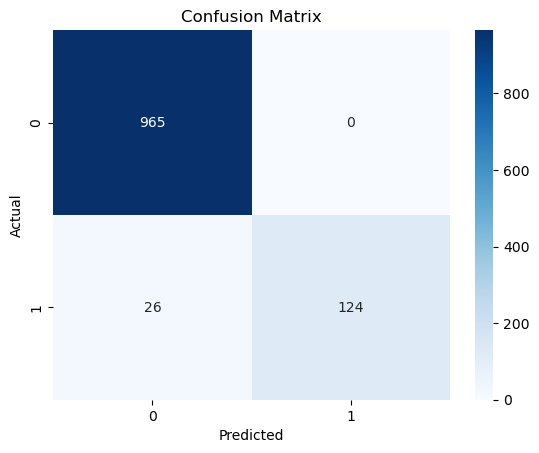

In [230]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [232]:
from sklearn.naive_bayes import MultinomialNB

# Try different smoothing values (alpha)
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9838565022421525


In [234]:
# Example: Include bi-grams (word pairs) in the feature set
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1, 2), min_df=2)
X = tfidf.fit_transform(data['message']).toarray()


In [236]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9524663677130045


In [238]:
pip install flask


In [240]:
import joblib

# Save the model
joblib.dump(nb, 'spam_classifier_model.pkl')

# Load the model
model = joblib.load('spam_classifier_model.pkl')


In [244]:
# Example of a new message
new_message = ["You have a meeting tommorrow."]

# Preprocess the new message the same way as you did with the training data
new_message_preprocessed = tfidf.transform(new_message).toarray()

# Predict if it's spam (1) or ham (0)
prediction = model.predict(new_message_preprocessed)

# Output the result
if prediction[0] == 1:
    print("This message is spam.")
else:
    print("This message is ham.")


This message is ham.
